In [1]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np

In [2]:
dfImr = pd.read_csv("./IMR, 2007-2016.txt", sep='\t', )
dfImr.dropna(subset=['State'], inplace = True)
dfImr = dfImr.set_index('State')
dfImr.head()

,Notes,State Code,Deaths,Births,Death Rate
State,,,,,
Alabama,NaN,1.0,534.0,59151.0,9.03
Mississippi,NaN,28.0,329.0,37928.0,8.67
Arkansas,NaN,5.0,314.0,38274.0,8.20
Louisiana,NaN,22.0,504.0,63178.0,7.98
Delaware,NaN,10.0,86.0,10992.0,7.82


In [3]:
dfImrByStateByRace = pd.read_csv("./IMR BY state by RACE, 2007-2016.txt", sep='\t')
dfImrByStateByRace.dropna(subset=['State'], inplace = True)
dfImrByStateByRace = dfImrByStateByRace.set_index("State")
dfImrByStateByRace.head()


,Notes,State Code,Race,Race Code,Deaths,Births,Death Rate
State,,,,,,,
North Dakota,NaN,38.0,American Indian or Alaska Native,1002-5,16.0,1029.0,15.55 (Unreliable)
Minnesota,NaN,27.0,American Indian or Alaska Native,1002-5,21.0,1386.0,15.15
North Dakota,NaN,38.0,Black or African American,2054-5,11.0,741.0,14.84 (Unreliable)
Wisconsin,NaN,55.0,Black or African American,2054-5,107.0,7456.0,14.35
Alabama,NaN,1.0,Black or African American,2054-5,264.0,18488.0,14.28


In [4]:
pdMerged = pd.merge(dfImr, dfImrByStateByRace, on='State', left_index=True)

In [7]:
dfImrByRace = pd.read_csv("./IMR by race, 2007-2016.txt", sep='\t')
dfImrByRace.dropna(subset=['Race'], inplace=True)
dfImrByRace['expected'] = dfImrByRace['Death Rate'].mean()

In [8]:
dfImrByRace.head()

,Notes,Race,Race Code,Deaths,Births,Death Rate,expected
0,NaN,Black or African American,2054-5,73877.0,6477025.0,11.41,7.29
1,NaN,American Indian or Alaska Native,1002-5,3873.0,465690.0,8.32,7.29
3,NaN,White,2106-3,160101.0,30838048.0,5.19,7.29
4,NaN,Asian or Pacific Islander,A-PI,11284.0,2664307.0,4.24,7.29


In [67]:
dfImrByCountyByRace = pd.read_csv("./IMR by county by race, 2007-2016.txt", sep='\t')
dfImrByCountyByRace.dropna(subset=['Race'], inplace=True)
dfImrByCountyByRace.shape

(844, 8)

In [70]:
# remove rows with unreliable death rate data (fewer than 20 deaths)
dfImrByCountyByRace = dfImrByCountyByRace.loc[dfImrByCountyByRace['Death Rate'].map(lambda x: 'Unreliable' not in str(x))]
# dfImrByCountyByRace.loc[dfImrByCountyByRace['Race'] is np.nan]
# todo: include uknown race
# dfImrByCountyByRace['Race'] = ["Unknown" if race is np.nan else race for race in dfImrByCountyByRace['Race']]

# convert death rate to float
dfImrByCountyByRace['Death Rate'] = dfImrByCountyByRace['Death Rate'].map(lambda x: float(x))


In [71]:
blacks = dfImrByCountyByRace.loc[dfImrByCountyByRace['Race Code'] == '2054-5']['Death Rate']
natives = dfImrByCountyByRace.loc[dfImrByCountyByRace['Race Code'] == '1002-5']['Death Rate']
whites = dfImrByCountyByRace.loc[dfImrByCountyByRace['Race Code'] == '2106-3']['Death Rate']
asians = dfImrByCountyByRace.loc[dfImrByCountyByRace['Race Code'] == 'A-PI']['Death Rate']
unknown = dfImrByCountyByRace.loc[dfImrByCountyByRace['Race'] == 'Unknown']['Death Rate']

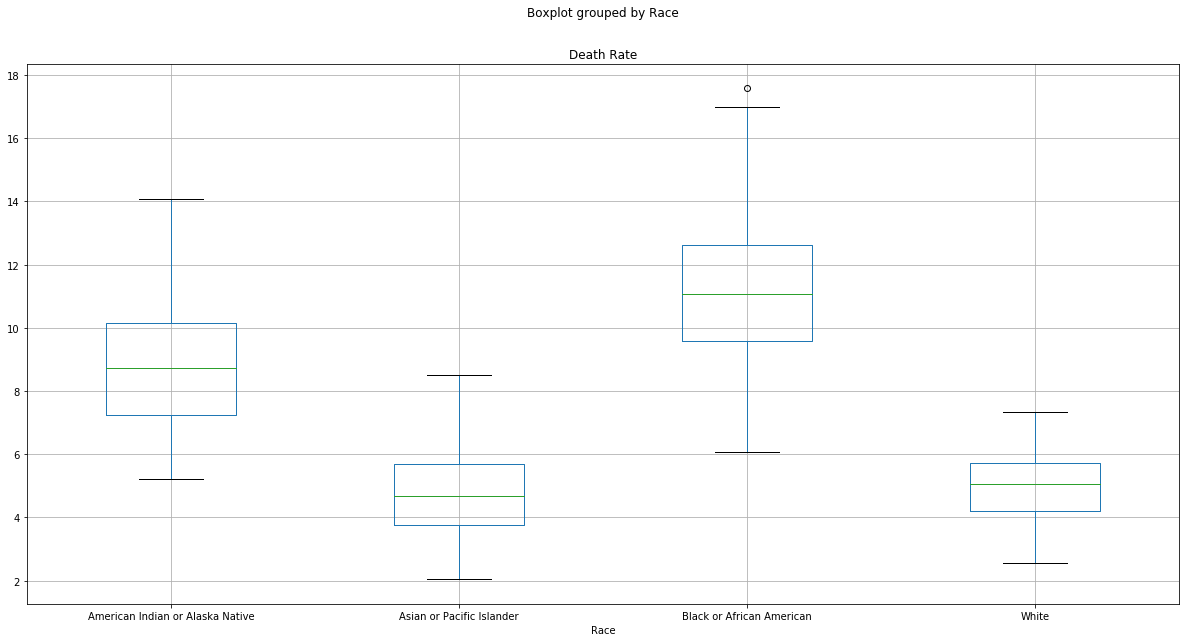

In [72]:
dfImrByCountyByRace.boxplot('Death Rate', by="Race", figsize=(20, 10))

In [13]:
# ANOVA shows that one (or more) race(s) is significantly different than the rest
stats.f_oneway(blacks, natives, whites, asians)

F_onewayResult(statistic=750.6014547203422, pvalue=4.2275575569554066e-222)

In [309]:
dfImrByCountyByRace.loc[(dfImrByCountyByRace['Race'] == "Black or African American") & (dfImrByCountyByRace['County'] == 'Allen County, IN')]

,Notes,County,County Code,Race,Race Code,Deaths,Births,Death Rate
266,NaN,"Allen County, IN",18003.0,Black or African American,2054-5,152.0,8647.0,17.58


In [310]:
dfImrByCountyByRace.loc[(dfImrByCountyByRace['Race'] == "Black or African American") & (dfImrByCountyByRace['County'] == 'Santa Clara County, CA')]

,Notes,County,County Code,Race,Race Code,Deaths,Births,Death Rate
90,NaN,"Santa Clara County, CA",6085.0,Black or African American,2054-5,37.0,6110.0,6.06


In [331]:
blacksByCounty = dfImrByCountyByRace.set_index(['Race', 'County']).sort_values(['Race', 'Death Rate'], ascending=False).loc['Black or African American']
# groupedByRace.sort_values(['Race', 'Death Rate'], ascending=False).loc['Black or African American']
blacksByCounty = blacksByCounty.loc[blacksByCounty['Death Rate'].notnull()]
# for county in blacksByCounty.index:
#     blacksByCounty
# blacksByCounty

In [336]:
blacksHighestImrCounties = blacksByCounty.head(10)
blacksHighestImrCounties.to_csv("./AfricanAmericanLImrCounties.csv")

,Notes,County Code,Race Code,Deaths,Births,Death Rate
County,,,,,,
"Allen County, IN",NaN,18003.0,2054-5,152.0,8647.0,17.58
"Caddo Parish, LA",NaN,22017.0,2054-5,376.0,22127.0,16.99
"Atlantic County, NJ",NaN,34001.0,2054-5,118.0,7219.0,16.35
"Hamilton County, OH",NaN,39061.0,2054-5,612.0,38789.0,15.78
"Mercer County, NJ",NaN,34021.0,2054-5,195.0,12363.0,15.77
"Fresno County, CA",NaN,6019.0,2054-5,151.0,9587.0,15.75
"Jefferson County, AL",NaN,1073.0,2054-5,662.0,42655.0,15.52
"Albany County, NY",NaN,36001.0,2054-5,103.0,6652.0,15.48
"St. Joseph County, IN",NaN,18141.0,2054-5,109.0,7068.0,15.42


In [339]:
blacksLowestImrCounties = blacksByCounty.tail(10)
blacksLowestImrCounties.to_csv("./AfricanAmericanLowestImrCounties.csv")

In [14]:
from statsmodels.stats import multicomp

In [15]:
# use pairwise tukeyhsd to find out which race is significnalty different than the rest  
answer = multicomp.pairwise_tukeyhsd(dfImrByCountyByRace['Death Rate'], dfImrByCountyByRace['Race'], alpha=0.05)

In [16]:
# reject True proves the hypothesis - that there is significant difference between two means
print(answer)

                    Multiple Comparison of Means - Tukey HSD,FWER=0.05                    
             group1                        group2          meandiff  lower   upper  reject
------------------------------------------------------------------------------------------
American Indian or Alaska Native Asian or Pacific Islander -4.0327  -4.8902 -3.1751  True 
American Indian or Alaska Native Black or African American  2.3376   1.5157  3.1595  True 
American Indian or Alaska Native           White           -3.8264  -4.6396 -3.0131  True 
   Asian or Pacific Islander     Black or African American  6.3702   5.9138  6.8267  True 
   Asian or Pacific Islander               White            0.2063  -0.2344  0.647  False 
   Black or African American               White           -6.1639  -6.5305 -5.7973  True 
------------------------------------------------------------------------------------------


In [18]:
dfImrByYearByRace = pd.read_csv("./imr by year by race, 2007-2016.txt", sep='\t')

In [19]:
dfImrByYearByRace.dropna(subset=['Year of Death'], inplace=True)
dfImrByYearByRace['Race'] = ['Unknown' if myrace is np.nan else myrace for myrace in dfImrByYearByRace['Race']]

In [20]:
dfImrByYearByRace.head()

,Notes,Year of Death,Year of Death Code,Race,Race Code,Deaths,Births,Death Rate
0,NaN,2007.0,2007.0,American Indian or Alaska Native,1002-5,456.0,49443.0,9.22
1,NaN,2007.0,2007.0,Asian or Pacific Islander,A-PI,1216.0,254488.0,4.78
2,NaN,2007.0,2007.0,Black or African American,2054-5,8732.0,675676.0,12.92
3,NaN,2007.0,2007.0,White,2106-3,18749.0,3336626.0,5.62
4,Total,2007.0,2007.0,Unknown,NaN,29153.0,4316233.0,6.75


In [21]:
dfPlot = dfImrByYearByRace.pivot('Year of Death', 'Race', 'Death Rate')
dfPlot.reset_index(inplace=True)


In [22]:
dfPlot.head()

Race,Year of Death,American Indian or Alaska Native,Asian or Pacific Islander,Black or African American,Unknown,White
0,2007.0,9.22,4.78,12.92,6.75,5.62
1,2008.0,8.42,4.51,12.37,6.61,5.56
2,2009.0,8.47,4.40,12.12,6.39,5.33
3,2010.0,8.28,4.27,11.21,6.14,5.21
4,2011.0,8.21,4.36,11.15,6.07,5.12


Text(0.5, 1.0, 'IMR by Race, 2001-2016')

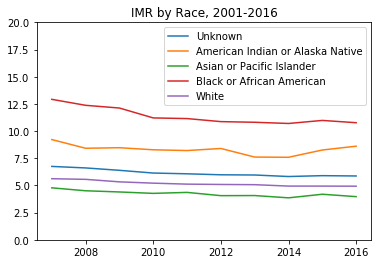

In [23]:
plt.plot(dfPlot['Year of Death'], dfPlot['Unknown'], label='Unknown')
plt.plot(dfPlot['Year of Death'], dfPlot['American Indian or Alaska Native'], label='American Indian or Alaska Native')
plt.plot(dfPlot['Year of Death'], dfPlot['Asian or Pacific Islander'], label='Asian or Pacific Islander')
plt.plot(dfPlot['Year of Death'], dfPlot['Black or African American'], label='Black or African American')
plt.plot(dfPlot['Year of Death'], dfPlot['White'], label='White')
plt.ylim(0, 20)
plt.legend()
plt.title ("IMR by Race, 2001-2016")

In [ ]:

# leading cause of death by age
# leading cause of death by race
# death by age by race
# WHO rates by country


In [183]:
# Death Rate by age
dfImrByAgeByCause = pd.read_csv("./IMR by age by cause, 2007-2016.txt", sep='\t')
dfImrByAgeByCause.sort_values(by='Death Rate', ascending=False).head(30)


,Notes,Age of Infant at Death,Age of Infant at Death Code,Cause of death,Cause of death Code,Deaths,Births,Death Rate
4171,Total,NaN,NaN,NaN,NaN,249135.0,40445070.0,6.16
4170,Total,28 - 364 days,5.0,NaN,NaN,83792.0,40445070.0,2.07
1100,Total,1 - 23 hours,2.0,NaN,NaN,63980.0,40445070.0,1.58
475,Total,Under 1 hour,1.0,NaN,NaN,36565.0,40445070.0,0.90
2704,Total,7 - 27 days,4.0,NaN,NaN,32413.0,40445070.0,0.80
1837,Total,1 - 6 days,3.0,NaN,NaN,32384.0,40445070.0,0.80
701,NaN,1 - 23 hours,2.0,Extreme immaturity,P07.2,18147.0,40445070.0,0.45
3988,NaN,28 - 364 days,5.0,Sudden infant death syndrome - SIDS,R95,17167.0,40445070.0,0.42
163,NaN,Under 1 hour,1.0,Extreme immaturity,P07.2,10528.0,40445070.0,0.26
3990,NaN,28 - 364 days,5.0,Other ill-defined and unspecified causes of mo...,R99,8889.0,40445070.0,0.22


In [ ]:
dfImrByAgeByCause['Age of Infant at Death'] = ["Unknown" if age is np.nan else age for age in dfImrByAgeByCause['Age of Infant at Death']]
# dfImrByAgeByCause.dropna(subset=['Age of Infant at Death'], inplace=True)
dfImrByAgeByCause = dfImrByAgeByCause.loc[dfImrByAgeByCause['Death Rate'].map(lambda x: 'Unreliable' not in str(x))]
#convert death rate to float
dfImrByAgeByCause['Death Rate'] = dfImrByAgeByCause['Death Rate'].map(lambda x: float(x))
# dfImrByAgeByCause.sort_values(by=['Death Rate'], ascending = False).head(20)

In [248]:
dfTotalsbyAgebyCause = dfImrByAgeByCause.loc[(dfImrByAgeByCause['Notes']=='Total') & (dfImrByAgeByCause['Age of Infant at Death'].notnull()) ]


In [258]:
# dfTotalsbyAgebyCause['Death Rate']
dfTotalsbyAgebyCause['Death Rate'] = [float(rate) for rate in dfTotalsbyAgebyCause['Death Rate']]

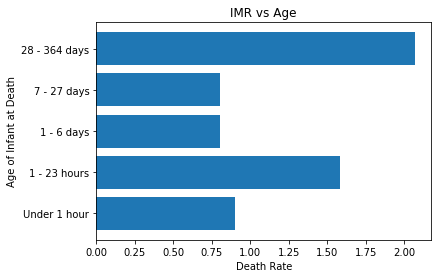

In [259]:
plt.barh(dfTotalsbyAgebyCause['Age of Infant at Death'], width=dfTotalsbyAgebyCause['Death Rate'])
# plt.barh(temp['Age of Infant at Death'], width=temp['Death Rate'])
# plt.yticks(dfTotalsbyAgebyCause['Age of Infant at Death'], dfTotalsbyAgebyCause['Age of Infant at Death'], rotation="vertical")
# plt.tight_layout
# plt.xlim(0, 5)
plt.title("IMR vs Age")
plt.ylabel("Age of Infant at Death")
plt.xlabel("Death Rate")
plt.show()


In [255]:
# removes rows that show total
dfImrByAgeByCause = dfImrByAgeByCause.loc[(dfImrByAgeByCause['Notes'] != 'Total')].sort_values(by=['Death Rate'], ascending=False).head(20)

In [256]:
infantsUnder1Hour = dfImrByAgeByCause.loc[dfImrByAgeByCause['Age of Infant at Death'] == 'Under 1 hour'].sort_values(by='Death Rate', ascending=False).head(3)
infantsUnder1Day = dfImrByAgeByCause.loc[dfImrByAgeByCause['Age of Infant at Death'] == '1 - 23 hours'].sort_values(by='Death Rate', ascending=False).head(3)
infants1To6Days = dfImrByAgeByCause.loc[dfImrByAgeByCause['Age of Infant at Death'] == '1 - 6 days'].sort_values(by='Death Rate', ascending=False).head(3)
infants7To27Days = dfImrByAgeByCause.loc[dfImrByAgeByCause['Age of Infant at Death'] == '7 - 27 days'].sort_values(by='Death Rate', ascending=False).head(3)
infants1monthTo1Year = dfImrByAgeByCause.loc[dfImrByAgeByCause['Age of Infant at Death'] == '28 - 364 days'].sort_values(by='Death Rate', ascending=False).head(3)


In [257]:
groupedByAgeTop3 = dfImrByAgeByCause.sort_values(by=['Age of Infant at Death', 'Death Rate'], ascending=False).groupby('Age of Infant at Death').head(3)
groupedByAgeTop3.head()

,Notes,Age of Infant at Death,Age of Infant at Death Code,Cause of death,Cause of death Code,Deaths,Births,Death Rate
163,NaN,Under 1 hour,1.0,Extreme immaturity,P07.2,10528.0,40445070.0,0.26
164,NaN,Under 1 hour,1.0,Other preterm infants,P07.3,3615.0,40445070.0,0.09
129,NaN,Under 1 hour,1.0,Newborn affected by premature rupture of membr...,P01.1,3061.0,40445070.0,0.08
2376,NaN,7 - 27 days,4.0,Necrotizing enterocolitis of newborn,P77,3408.0,40445070.0,0.08
2324,NaN,7 - 27 days,4.0,"Bacterial sepsis of newborn, unspecified",P36.9,2633.0,40445070.0,0.07
